In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import skimage
from skimage.io import imread,imsave
from skimage.color import rgb2gray
from PIL import Image
import math

import torch
import torchvision
import torchvision.transforms as transforms

In [58]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [59]:
def calcula_histograma(img):
    # convertendo a imagem em array numpy
    img = np.asarray(img)

    # achatando a matriz em array 1D
    flat = img.flatten()
    # coletando o histograma com a função numpy
    histogram, bin_edges = np.histogram(img, bins=256, range=(0, 256))
    return histogram

def media_histograma(histograma):
    soma = 0
    total = 0
    for i in range(len(histograma)):
        soma += histograma[i]*i
        total += histograma[i]
    return soma/total

def variancia_histograma(histograma,media):
    soma = 0
    total = 0
    for i in range(len(histograma)):
        soma += (i-media)**2*histograma[i]
        total += histograma[i]
    return soma/total

def skewness_histograma(histograma,media,variancia):
    desvio_padrao = variancia**0.5
    soma = 0
    total = 0
    for i in range(len(histograma)):
        soma += ((i-media)/desvio_padrao)**3*histograma[i]
        total += histograma[i]
    return soma/total

def kurtosis_histograma(histograma,media,variancia):
    desvio_padrao = variancia**0.5
    soma = 0
    total = 0
    for i in range(len(histograma)):
        soma += ((i-media)/desvio_padrao)**4*histograma[i]
        total += histograma[i]
    return soma/total-3

def energia_histograma(histograma):
    soma = 0
    for i in range(len(histograma)):
        soma += histograma[i]**2
    return soma

def entropia_histograma(histograma):
    soma = 0
    total = sum(histograma)
    for i in range(len(histograma)):
        p = histograma[i]/total
        if p > 0:
            soma += -p*math.log2(p)
    return soma

def descritor_histograma(imagem, label):
    histograma = calcula_histograma(imagem)
    media = media_histograma(histograma)
    var = variancia_histograma(histograma,media)
    sk = skewness_histograma(histograma,media,var)
    kur = kurtosis_histograma(histograma,media,var)
    ener = energia_histograma(histograma)
    entr = entropia_histograma(histograma)

    return [media,var,sk,kur,ener,entr, label]

In [63]:
transform = transforms.Compose(
    [transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1,
                                         shuffle=False, num_workers=2)

classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Files already downloaded and verified
Files already downloaded and verified


In [64]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [65]:
# class_correct = list(0. for i in range(10))
# class_total = list(0. for i in range(10))
result_images = list()
aux = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        result_images.append(descritor_histograma(images * 255, labels.item()))

In [66]:
np_array_result = np.array(result_images)

In [67]:
np_array_result

array([[ 1.88684570e+02,  6.04472049e+03, -8.85632259e-01, ...,
         8.42836000e+05,  6.09684365e+00,  9.00000000e+00],
       [ 7.95888672e+01,  2.42509562e+03,  7.72897038e-01, ...,
         6.75920000e+04,  7.33095189e+00,  2.00000000e+00],
       [ 1.19164062e+02,  3.10712022e+03,  2.29188934e-01, ...,
         5.22040000e+04,  7.66418697e+00,  1.00000000e+00],
       ...,
       [ 1.17898763e+02,  1.82218409e+03,  9.04223523e-01, ...,
         1.16790000e+05,  6.73874076e+00,  2.00000000e+00],
       [ 1.31861979e+02,  2.54653759e+03, -1.12695610e-01, ...,
         5.57540000e+04,  7.51349408e+00,  6.00000000e+00],
       [ 1.19912760e+02,  4.49434851e+03,  3.80401845e-01, ...,
         4.81240000e+04,  7.76081639e+00,  3.00000000e+00]])

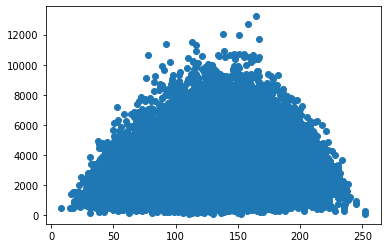

In [68]:
plt.scatter(np_array_result[:,0], np_array_result[:,1])

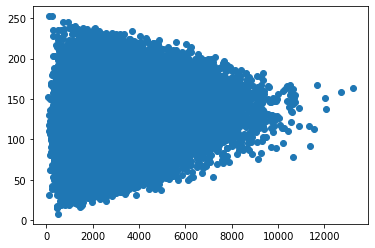

In [69]:
plt.scatter(np_array_result[:,1], np_array_result[:,0])

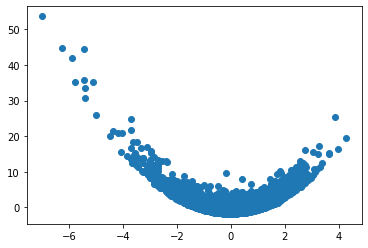

In [70]:
plt.scatter(np_array_result[:,2], np_array_result[:,3])

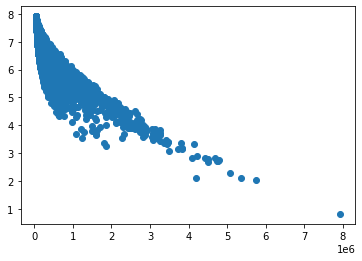

In [71]:
plt.scatter(np_array_result[:,4], np_array_result[:,5])

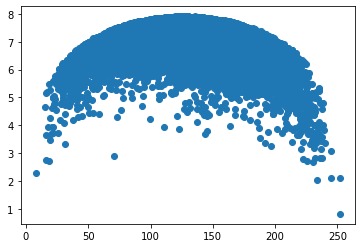

In [72]:
plt.scatter(np_array_result[:,0], np_array_result[:,5])

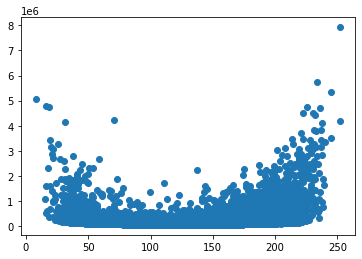

In [73]:
plt.scatter(np_array_result[:,0], np_array_result[:,4])

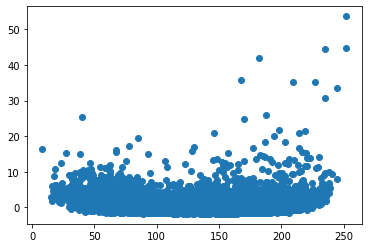

In [74]:
plt.scatter(np_array_result[:,0], np_array_result[:,3])

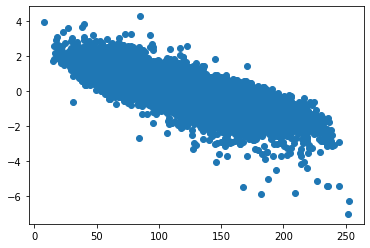

In [75]:
plt.scatter(np_array_result[:,0], np_array_result[:,2])

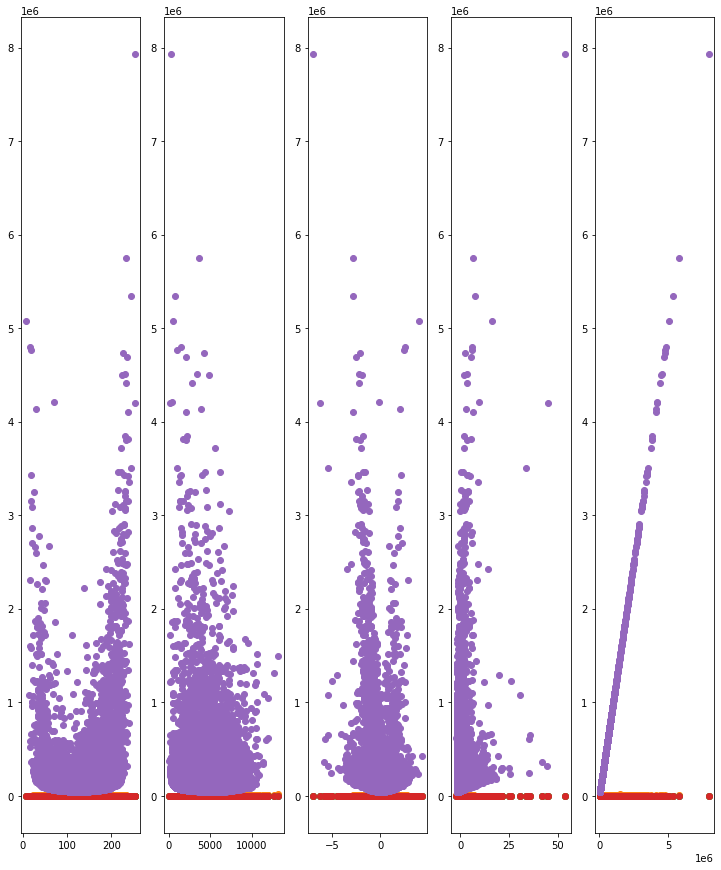

In [76]:
plt.figure(figsize=(15,15))
for x in range(5):
  plt.subplot(1,6,x+1)
  for j in range(5):
    plt.scatter(np_array_result[:,x], np_array_result[:,j])

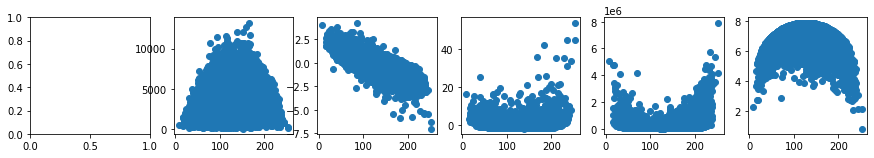

In [77]:
plt.figure(figsize=(15,15))
for x in range(6):
  plt.subplot(6,6,x+1)
  if (x != 0):
    plt.scatter(np_array_result[:,0], np_array_result[:,x])

In [78]:
np.savetxt("dataset_descritor.csv", np_array_result, delimiter=",")

In [79]:
import pandas as pd

data_frame = pd.read_csv("/content/dataset_descritor.csv", sep=',',
                         names=['Media', 'Variancia', 'Skewness', 'Kurtosis', 'Energia', 'Entropia', "Classe"])

In [80]:
data_frame.head()

,Media,Variancia,Skewness,Kurtosis,Energia,Entropia,Classe
0,188.684570,6044.720491,-0.885632,-0.669341,842836.0,6.096844,9.0
1,79.588867,2425.095618,0.772897,-0.160301,67592.0,7.330952,2.0
2,119.164062,3107.120219,0.229189,-0.663229,52204.0,7.664187,1.0
3,148.294596,3064.033981,0.140607,-0.845079,53532.0,7.574368,7.0
4,123.486328,3792.819475,0.429193,-1.033154,54658.0,7.638526,4.0


In [81]:
data_frame.to_csv('dataset_descritor.csv', index=False)

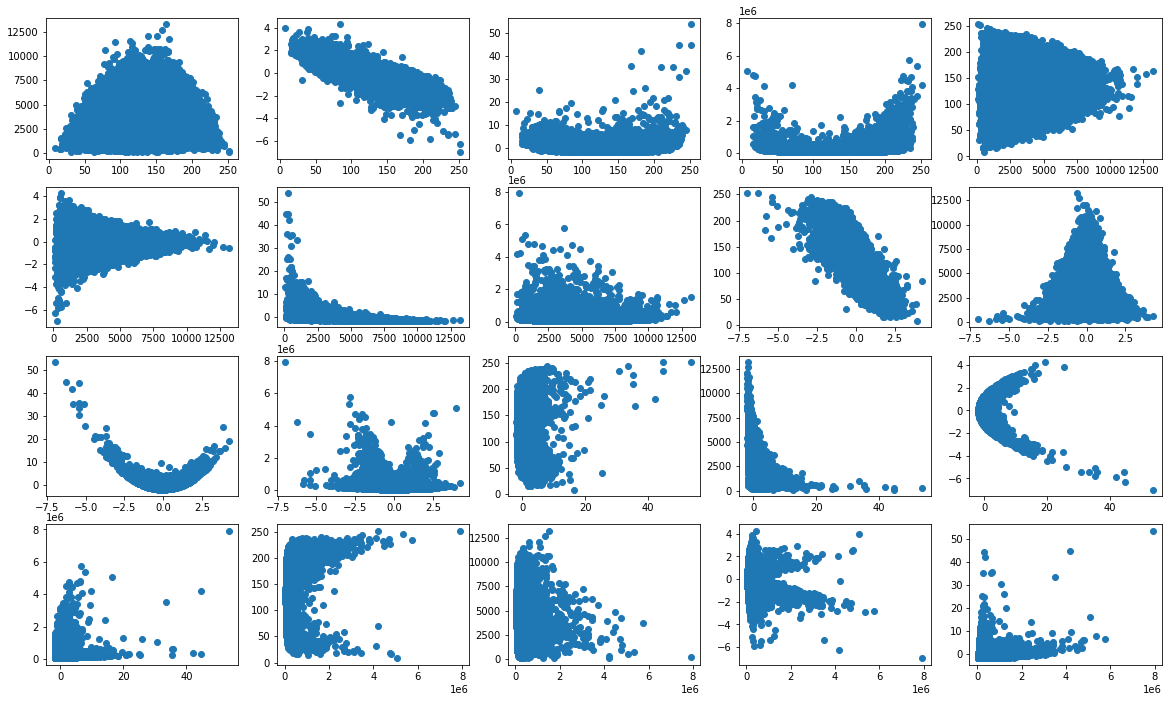

In [82]:
fig=plt.figure(figsize=(20,15))
contador=1
for x in range(5):
  for j in range(5):
    if(x!=j):
      fig.add_subplot(5, 5, contador)
      plt.scatter(np_array_result[:,x], np_array_result[:,j])
      contador+=1
plt.show()


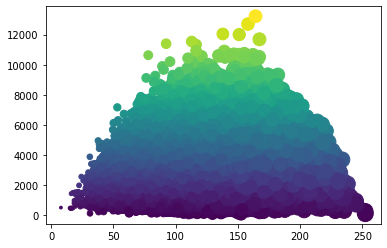

In [83]:
plt.scatter(data_frame.Media, data_frame.Variancia, s=data_frame.Media, c=data_frame.Variancia)

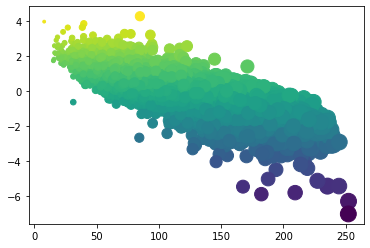

In [84]:
plt.scatter(data_frame.Media, data_frame.Skewness, s=data_frame.Media, c=data_frame.Skewness)

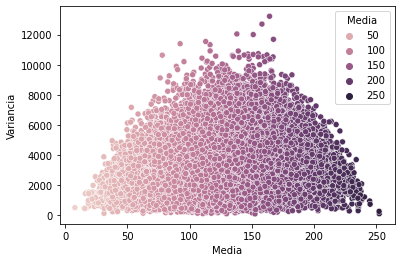

In [85]:
import seaborn as sb

sb.scatterplot(data=data_frame, x=data_frame.Media, y=data_frame.Variancia, hue=data_frame.Media)

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.metrics import accuracy_score as acc

def classification(X,y):

    """
    X é uma matriz onde cada linha corresponde aos atributos calculados com o descritor
    y são os rótulos da classe de cada imagem. Exemplo [0,1,0,0,1,2,2,0,0,0,...,1]
    """
    # separar conjuntos de treino e teste
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)
    # criar instancia do classificador
    clf = mlp()
    # treinar o classificador
    clf.fit(X_train,y_train)
    # realizar a predicao
    pred = clf.predict(X_test)
    # calcular o resultado utilizando a acuracia
    acuracia = acc(y_test,pred)
    
    return acuracia

In [91]:
np_array_result.shape

(50000, 7)

In [92]:
acc = classification(np_array_result, data_frame.Classe)

In [93]:
acc

0.1038